In [1]:
import pywt
import numpy as np
import scaleogram as scg
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import pandas as pd


(2048,)
[ 0.00000000e+00  3.05968084e-01  6.06094478e-01 ... -6.06094478e-01
 -3.05968084e-01  3.92877345e-15]


TypeError: alpha must be a float or None

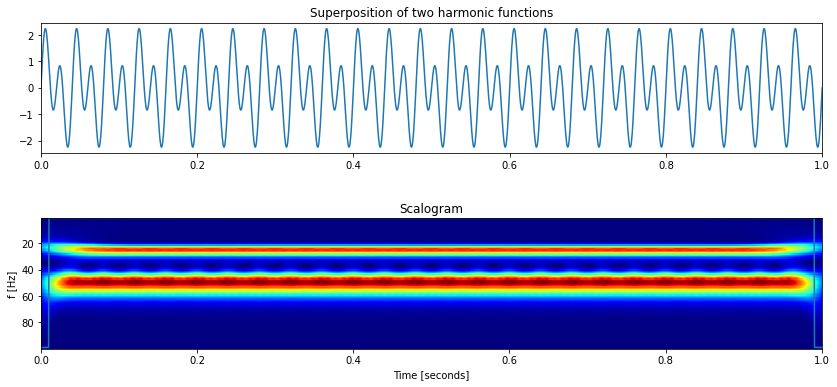

In [6]:
import numpy as np
import matplotlib.pyplot as plt
n = 2048
dt=1/n
time=np.linspace(0,1,num=n)
p1    = 25;  f1 = p1
p2    = 50; f2 = p2
data = np.sin( (2*np.pi*f1) * time) + 1.5*np.sin( (2*np.pi*f2) * time)

print(data.shape)
print(data)

wavelet='cmor0.8-1.5'
fa=np.arange(1,100)
a=pywt.central_frequency(wavelet)/( dt * fa)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5)
ax1.plot(time, data); ax1.set_xlim(0, 1)
ax1.set_title('Superposition of two harmonic functions')
ax2 = scg.cws(time, data, scales=a, wavelet=wavelet,yaxis='frequency',spectrum='power',
        ax=ax2, cmap="jet", ylabel="f [Hz]", xlabel="Time [seconds]",
        yscale='linear', title='Scalogram')
ax2.set_ylim(0, 100)



Scalogram using plain PyWavelets

[3072.         1536.         1024.          768.          614.4
  512.          438.85714286  384.          341.33333333  307.2
  279.27272727  256.          236.30769231  219.42857143  204.8
  192.          180.70588235  170.66666667  161.68421053  153.6
  146.28571429  139.63636364  133.56521739  128.          122.88
  118.15384615  113.77777778  109.71428571  105.93103448  102.4
   99.09677419   96.           93.09090909   90.35294118   87.77142857
   85.33333333   83.02702703   80.84210526   78.76923077   76.8
   74.92682927   73.14285714   71.44186047   69.81818182   68.26666667
   66.7826087    65.36170213   64.           62.69387755   61.44
   60.23529412   59.07692308   57.96226415   56.88888889   55.85454545
   54.85714286   53.89473684   52.96551724   52.06779661   51.2
   50.36065574   49.5483871    48.76190476   48.           47.26153846
   46.54545455   45.85074627   45.17647059   44.52173913   43.88571429
   43.26760563   42.66666667   42.08219178   41.51351351   40.96
  

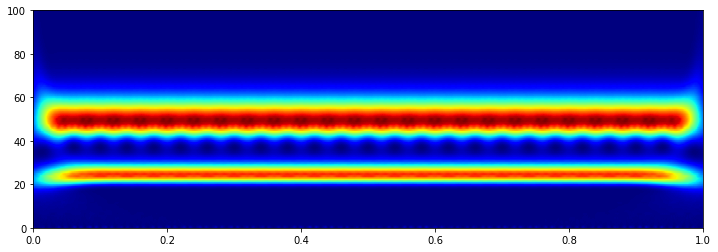

In [11]:
coeff,freqs=pywt.cwt(data,a,wavelet,dt)
print(a, len(a))
print(dt)
cwtPower=abs(coeff)**2
print(cwtPower.shape)
fig, ax=plt.subplots(figsize=(12, 4))
im=ax.imshow(cwtPower[::-1],aspect='auto',cmap="jet",extent=[0,1,0,100])